# Desafio 2

#### Exercício 1:  Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

### Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Análise Exploratória

In [2]:
df_penguins = pd.read_csv('penguins.csv')

In [3]:
print('Shape: ', df_penguins.shape)
df_penguins.info()

Shape:  (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df_penguins.rename({'culmen_length_mm':'c_len', 'culmen_depth_mm':'c_dep', 
                    'flipper_length_mm': 'f_len', 'body_mass_g':'mass'}, axis=1, inplace=True)

In [5]:
df_penguins.nunique()

species      3
island       3
c_len      164
c_dep       80
f_len       55
mass        94
sex          2
dtype: int64

In [6]:
df_penguins.isna().sum()

species     0
island      0
c_len       2
c_dep       2
f_len       2
mass        2
sex        11
dtype: int64

In [7]:
df_penguins.loc[df_penguins.isna().any(axis=1)]

,species,island,c_len,c_dep,f_len,mass,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [8]:
df_penguins.dropna(inplace=True)

In [9]:
df_penguins.loc[df_penguins.isna().any(axis=1)]

,species,island,c_len,c_dep,f_len,mass,sex


In [10]:
df_penguins.isna().sum()

species    0
island     0
c_len      0
c_dep      0
f_len      0
mass       0
sex        0
dtype: int64

In [11]:
df_penguins.shape

(333, 7)

In [12]:
df_penguins.duplicated().sum()

0

In [13]:
for c in df_penguins.columns:
    if df_penguins[c].dtype == 'object':
        print(df_penguins[c].value_counts(),'\n')

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64 

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64 

MALE      168
FEMALE    165
Name: sex, dtype: int64 



In [14]:
def anota(ax):
    for bar in ax.patches:
        valor = bar.get_height()
        x = bar.get_x()+bar.get_width()/2
        ax.annotate(valor, xy=(x, valor/2), ha='center')

In [15]:
def plots(col):
    df_penguins[col].value_counts().plot(kind='bar', figsize=(12,8), title=col.capitalize())
    axis = plt.gca()
    anota(axis)
    plt.show()

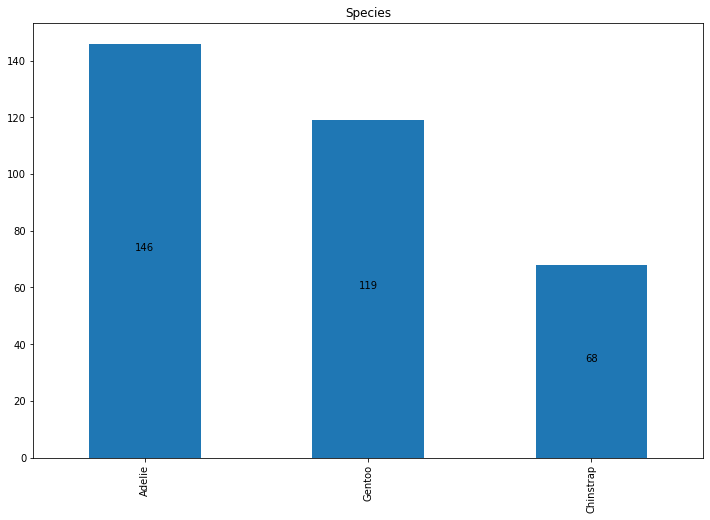

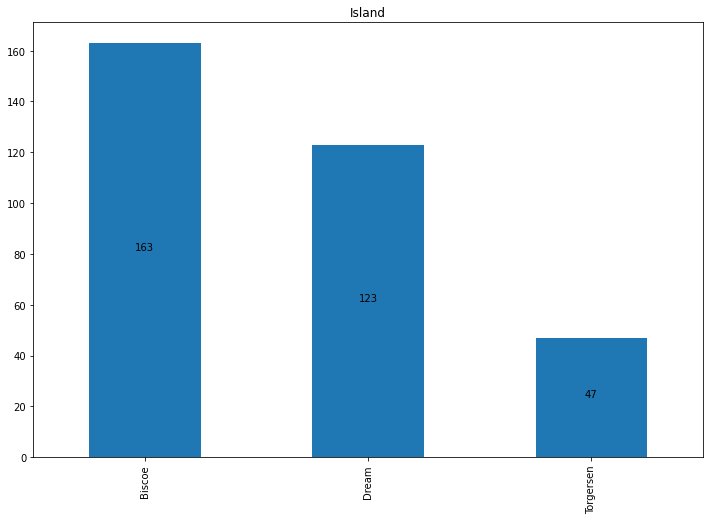

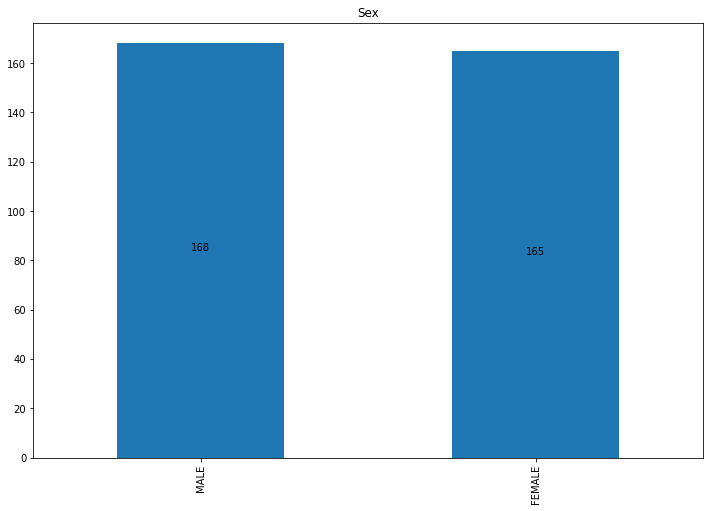

In [16]:
plots('species')
plots('island')
plots('sex')

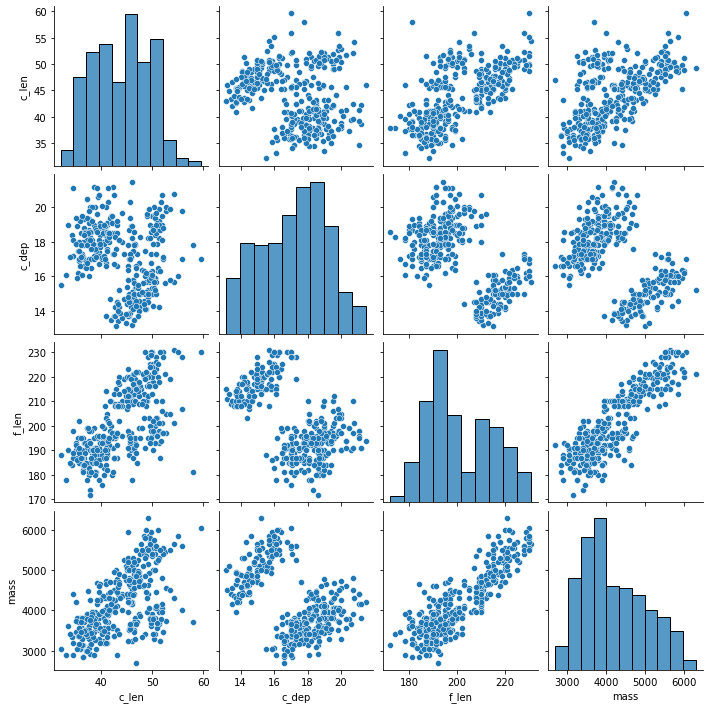

In [17]:
pair = sns.pairplot(data=df_penguins)
plt.show()

In [18]:
df_penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
c_len,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
c_dep,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
f_len,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
mass,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


#### Exercício 2:  Imprima as matrizes de covariância e de correlação do `dataframe` e avalie as relações entre os atributos.

In [19]:
df_penguins.cov()

,c_len,c_dep,f_len,mass
c_len,29.906333,-2.462091,50.058195,2595.623304
c_dep,-2.462091,3.877888,-15.947248,-748.456122
f_len,50.058195,-15.947248,196.441677,9852.191649
mass,2595.623304,-748.456122,9852.191649,648372.487699


In [20]:
df_penguins.corr()

,c_len,c_dep,f_len,mass
c_len,1.000000,-0.228626,0.653096,0.589451
c_dep,-0.228626,1.000000,-0.577792,-0.472016
f_len,0.653096,-0.577792,1.000000,0.872979
mass,0.589451,-0.472016,0.872979,1.000000


Pode-se notar uma forte correlação positiva entre `mass` e `f_len`

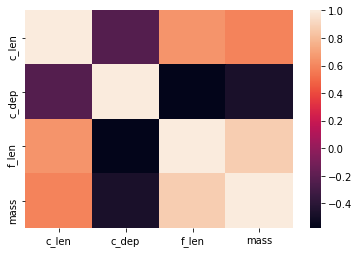

In [21]:
sns.heatmap(df_penguins.corr())
plt.show()

#### Exercício 3: Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

In [22]:
def bxplt(df, figsize=(12,8), **col):
    col = col.get('col')
    plt.figure(figsize=figsize)
    if col:
        plot = sns.boxplot(data=df, y=col)
    else:
        plot = sns.boxplot(data=df)
    plt.show()

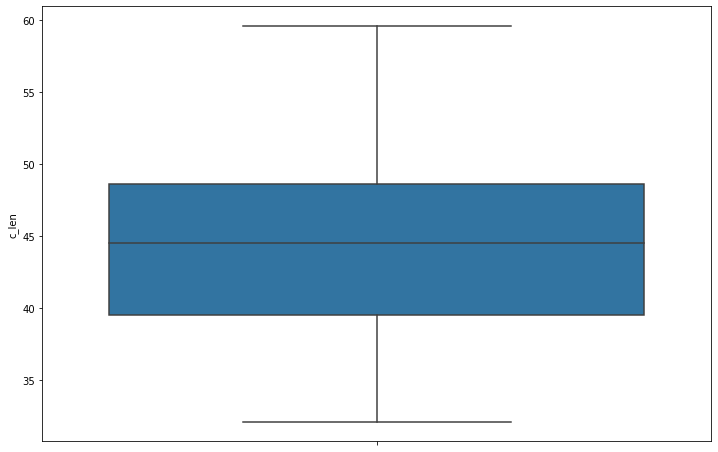

In [23]:
bxplt(df_penguins, col='c_len')

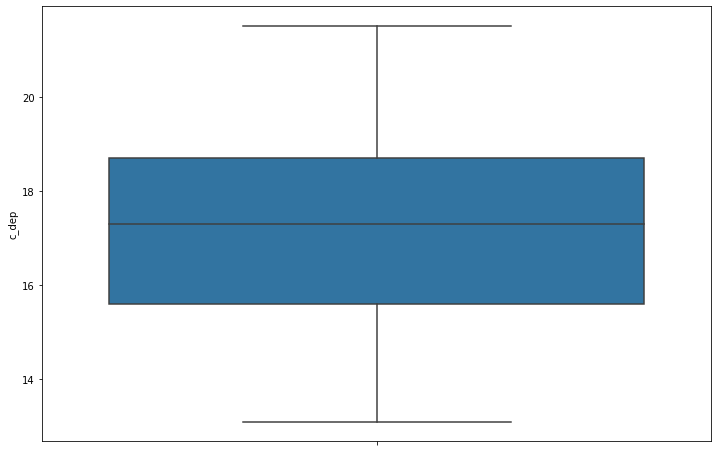

In [24]:
bxplt(df_penguins, col='c_dep')

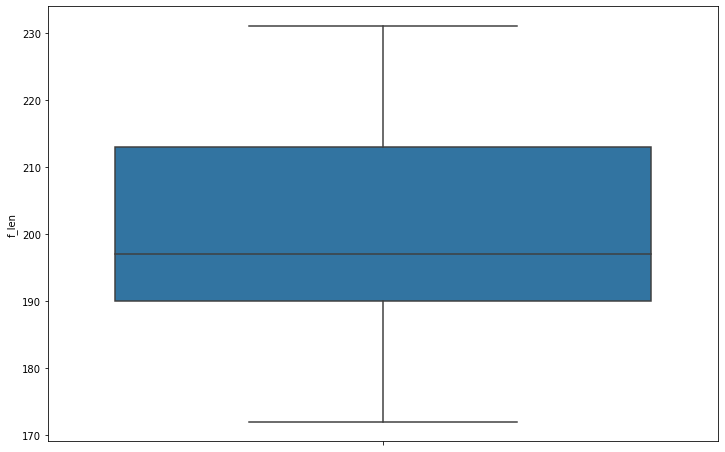

In [25]:
bxplt(df_penguins, col='f_len')

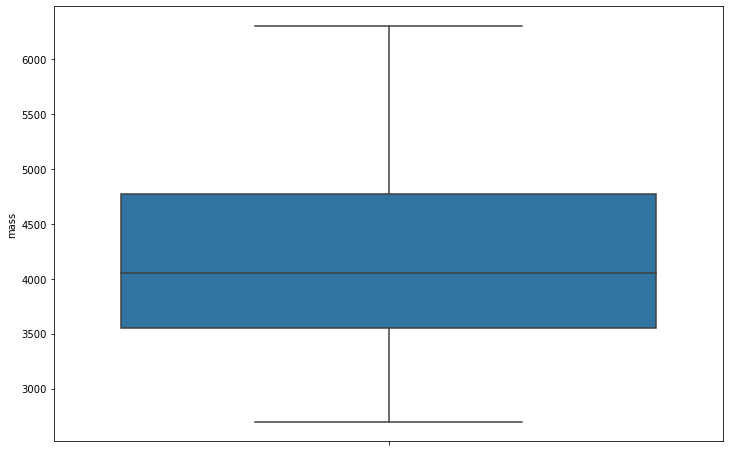

In [26]:
bxplt(df_penguins, col='mass')

#### Exercício 4: Plote um gráfico de dispersão entre as colunas `'body_mass_g'` e `'flipper_length_mm'`, de modo a observar a origem do animal e seu sexo. Discuta suas observações.

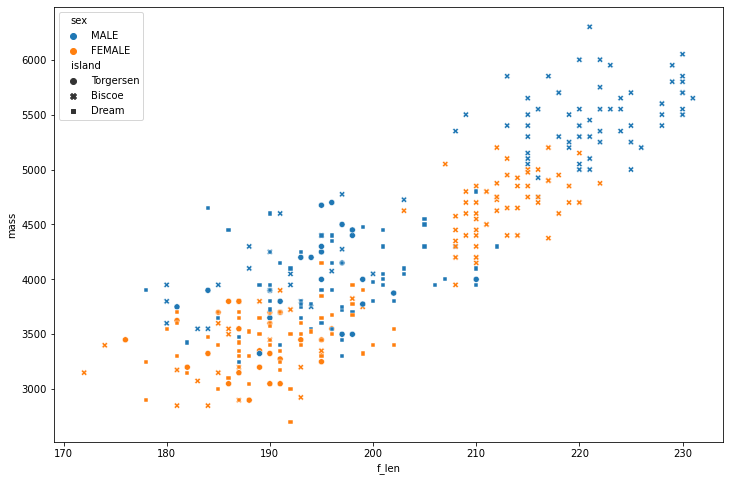

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_penguins, x='f_len', y='mass', hue='sex', style='island')

##### Observa-se que os pinguins da ilha de `Biscoe` em sua grande maioria tem asas maiores e são mais pesados que os das outra ilhas, e nessa ilha, os indivíduos do sexo masculino apresentam ter asas maiores e serem mais pesados que as fêmeas da mesma ilha. Para as ilhas de `Torgersen` e `Dream` o mesmo padrão se apresenta, apesar da maior parte dos indivíduos possuírem asas menores e menor peso

#### Exercício 5: Carregue o dataframe `penguins` utilizando a função [`seaborn.load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), realize uma análise exploratória rápida e estude a relação entre os atributos `flipper_length_mm` e `body_mass_g`, para então propor um modelo de regressão linear simples para essa relação.

#### Plote novamente a dispersão entre `flipper_length_mm` e `body_mass_g`, juntamente com a curva de regressão e imprima os coeficientes calculados na tela.

In [28]:
df = sns.load_dataset('penguins')

In [29]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [30]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [31]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
x = df.flipper_length_mm.array.to_numpy().reshape(-1,1)
y = df.body_mass_g.array.to_numpy().reshape(-1,1)

In [36]:
y.shape

(333, 1)

In [37]:
lin = LinearRegression().fit(x, y)

In [38]:
lin.score(x, y)

0.7620921573403914

In [39]:
print('Intercepto: ', lin.intercept_[0])
print('Coeficiente: ', lin.coef_[0][0])

Intercepto:  -5872.092682842825
Coeficiente:  50.15326594224113


In [40]:
pred = lin.predict(x)

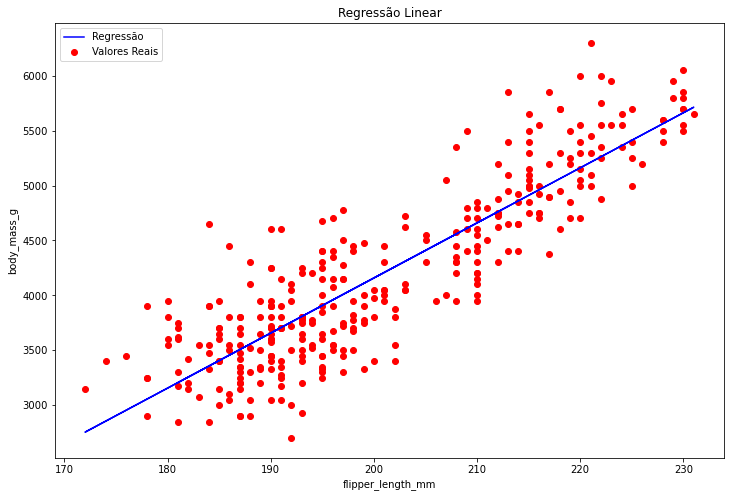

In [41]:
plt.figure(figsize=(12,8))
plt.title('Regressão Linear')
plt.scatter(x, y, color='red')
plt.plot(x, pred, color = 'blue')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.legend(['Regressão', 'Valores Reais'], loc=2)
plt.show()

#### Exercício 6: Ainda considerando o dataset `penguins.csv` considere as seguintes combinações de múltiplos atributos: 

- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex'])
- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
- ['culmen_length_mm', 'culmen_depth_mm'])
- ['culmen_length_mm'])

#### e submeta os mesmos à regressão linear múltipla, comparando as métricas:

- MAE
- MSE
- RMSE
- R2

#### para cada combinação. Discuta os resultados.

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
backup = df_penguins.copy(deep=True)

In [44]:
backup.reset_index(drop=True, inplace=True)

In [45]:
cols = ['c_len', 'c_dep', 'f_len', 'mass']
for c in cols:
    scaler = MinMaxScaler().fit_transform(backup[c].to_numpy().reshape(-1,1)).reshape(-1)
    x = pd.DataFrame(scaler, columns=[c])
    backup.drop([c], axis=1, inplace=True)
    backup = pd.concat([backup, x], axis=1)

In [46]:
backup

,species,island,sex,c_len,c_dep,f_len,mass
0,Adelie,Torgersen,MALE,0.254545,0.666667,0.152542,0.291667
1,Adelie,Torgersen,FEMALE,0.269091,0.511905,0.237288,0.305556
2,Adelie,Torgersen,FEMALE,0.298182,0.583333,0.389831,0.152778
3,Adelie,Torgersen,FEMALE,0.167273,0.738095,0.355932,0.208333
4,Adelie,Torgersen,MALE,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,FEMALE,0.549091,0.071429,0.711864,0.618056
329,Gentoo,Biscoe,FEMALE,0.534545,0.142857,0.728814,0.597222
330,Gentoo,Biscoe,MALE,0.665455,0.309524,0.847458,0.847222
331,Gentoo,Biscoe,FEMALE,0.476364,0.202381,0.677966,0.694444


In [47]:
df_dummy = pd.get_dummies(backup, drop_first=True)

In [48]:
df_dummy

,c_len,c_dep,f_len,mass,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,0.254545,0.666667,0.152542,0.291667,0,0,0,1,1
1,0.269091,0.511905,0.237288,0.305556,0,0,0,1,0
2,0.298182,0.583333,0.389831,0.152778,0,0,0,1,0
3,0.167273,0.738095,0.355932,0.208333,0,0,0,1,0
4,0.261818,0.892857,0.305085,0.263889,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,0,1,0,0,0
329,0.534545,0.142857,0.728814,0.597222,0,1,0,0,0
330,0.665455,0.309524,0.847458,0.847222,0,1,0,0,1
331,0.476364,0.202381,0.677966,0.694444,0,1,0,0,0


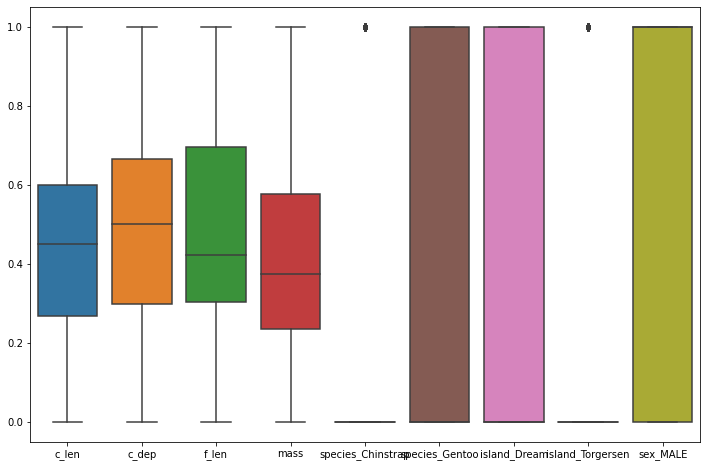

In [49]:
bxplt(df_dummy)

In [50]:
features = ['c_len', 'c_dep', 'f_len', 'sex_MALE']

In [51]:
X1 = df_dummy[features]
X2 = df_dummy[features[:3]]
X3 = df_dummy[features[:2]]
X4 = df_dummy[features[0]].to_numpy().reshape(-1,1)
y = df_dummy['mass']

In [52]:
mult_reg_1 = LinearRegression().fit(X1, y)
mult_reg_2 = LinearRegression().fit(X2, y)
mult_reg_3 = LinearRegression().fit(X3, y)
mult_reg_4 = LinearRegression().fit(X4, y)

In [53]:
pred_reg_1 = mult_reg_1.predict(X1)
pred_reg_2 = mult_reg_2.predict(X2)
pred_reg_3 = mult_reg_3.predict(X3)
pred_reg_4 = mult_reg_4.predict(X4)

In [54]:
regs = [mult_reg_1, mult_reg_2, mult_reg_3, mult_reg_4]
preds = [pred_reg_1, pred_reg_2, pred_reg_3, pred_reg_4]
for i, reg in enumerate(regs):
    print(f'Intercepto Reg {i+1}: ', reg.intercept_)
    print(f'Coeficientes Reg {i+1}: ', reg.coef_)
    print('Métricas: \n')
    print(f'MAE: {mean_absolute_error(y, preds[i])}')
    print(f'MSE: {mean_squared_error(y, preds[i])}')
    print(f'RMSE: {mean_squared_error(y, preds[i])**1/2}')
    print(f'R2: {r2_score(y, preds[i])}\n')

Intercepto Reg 1:  0.13529744974231922
Coeficientes Reg 1:  [-0.01778855 -0.20087253  0.63631217  0.1502857 ]
Métricas: 

MAE: 0.07683654977398548
MSE: 0.00882810838173756
RMSE: 0.00441405419086878
R2: 0.8230077584726003

Intercepto Reg 2:  -0.02084216260642663
Coeficientes Reg 2:  [0.02515381 0.04161825 0.83193494]
Métricas: 

MAE: 0.08612847720688273
MSE: 0.011774485551188018
RMSE: 0.005887242775594009
R2: 0.7639366781169294

Intercepto Reg 3:  0.3357758437691577
Coeficientes Reg 3:  [ 0.57148533 -0.33951676]
Métricas: 

MAE: 0.133452752163709
MSE: 0.026562073319976013
RMSE: 0.013281036659988006
R2: 0.4674645243092971

Intercepto Reg 4:  0.13190573429077918
Coeficientes Reg 4:  [0.66299261]
Métricas: 

MAE: 0.1467513635513565
MSE: 0.03254808810854098
RMSE: 0.01627404405427049
R2: 0.34745261128883764



# Como podemos observar, à medida que reduzimos o número de features para a regressão, as métricas de erro aumentam e a métrica de ajuste R² diminui

In [55]:
erro_1 = (y - pred_reg_1).rename('erro_1')
erro_2 = (y - pred_reg_2).rename('erro_2')
erro_3 = (y - pred_reg_3).rename('erro_3')
erro_4 = (y - pred_reg_4).rename('erro_4')

In [56]:
erro_1

0      0.047462
1      0.126883
2     -0.108094
3     -0.002210
4     -0.031816
         ...   
328    0.053906
329    0.036377
330    0.096404
331    0.176876
332    0.105488
Name: erro_1, Length: 333, dtype: float64

In [57]:
erros = pd.DataFrame([y, erro_1, erro_2, erro_3, erro_4]).T
erros

,mass,erro_1,erro_2,erro_3,erro_4
0,0.291667,0.047462,0.151455,0.036766,-0.009001
1,0.305556,0.126883,0.100916,-0.010202,-0.004755
2,0.152778,-0.108094,-0.182471,-0.155353,-0.176820
3,0.208333,-0.002210,-0.101863,0.027559,-0.034473
4,0.263889,-0.031816,-0.012824,0.081628,-0.041600
...,...,...,...,...,...
328,0.618056,0.053906,0.029888,-0.007266,0.122107
329,0.597222,0.036377,-0.007652,0.004464,0.110917
330,0.847222,0.096404,0.133414,0.236237,0.274125
331,0.694444,0.176876,0.130858,0.155145,0.246713


In [58]:
erros.describe()

,mass,erro_1,erro_2,erro_3,erro_4
count,333.000000,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,0.418627,1.833702e-17,6.801366e-17,-4.834304e-17,-8.668408e-18
std,0.223671,9.409941e-02,1.086736e-01,1.632240e-01,1.806824e-01
min,0.000000,-2.577261e-01,-2.920479e-01,-5.018735e-01,-4.887163e-01
25%,0.236111,-6.879362e-02,-7.902887e-02,-1.268937e-01,-1.302266e-01
50%,0.375000,1.532303e-03,-5.657691e-03,4.257220e-03,7.720007e-03
75%,0.576389,6.127840e-02,6.695186e-02,1.308515e-01,1.289458e-01
max,1.000000,2.751253e-01,3.565313e-01,4.281487e-01,4.558334e-01


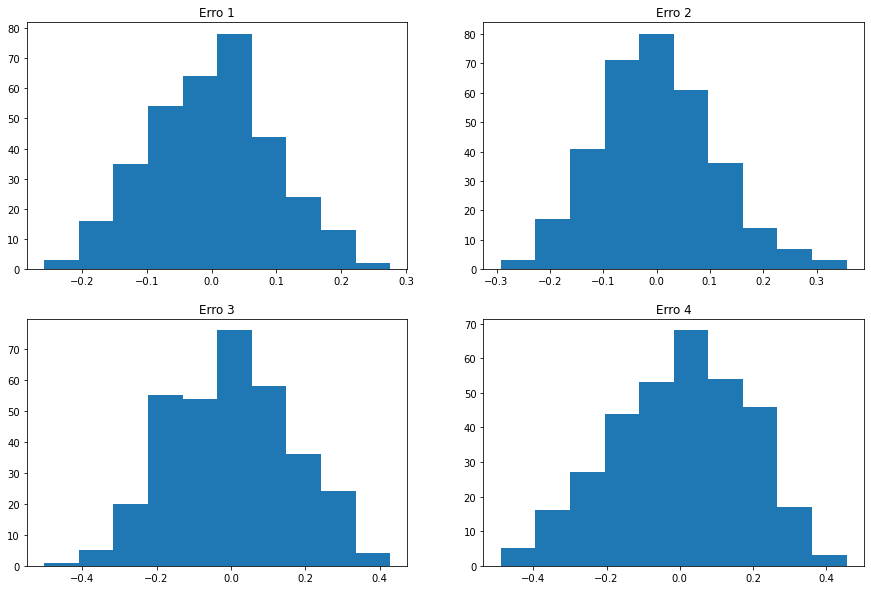

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
ax1.hist(x=erros.erro_1)
ax2.hist(x=erros.erro_2)
ax3.hist(x=erros.erro_3)
ax4.hist(x=erros.erro_4)
ax1.set_title('Erro 1')
ax2.set_title('Erro 2')
ax3.set_title('Erro 3')
ax4.set_title('Erro 4')
plt.show()

# Erros com distribuição aproximadamente normal para todos os modelos de regressão linear